이번에는 머신러닝 모델링 과정에서 초심자가 가장 흔하게 겪는 실패이자, 가장 극복하기 어려운 난관인 '과적합(Overfitting)'과 이를 해결하기 위한 '규제(Regularization)' 기법을 다룬다.

이 시간의 핵심은 "학습 데이터에서 100점을 맞는 모델이, 실전에서는 0점을 맞을 수 있다"는 역설을 이해하는 것이다. 헬스케어 데이터는 노이즈가 많고 복잡하기 때문에, 모델이 데이터의 '신호'가 아닌 '소음'까지 외워버리는 현상을 경계해야 한다. 이를 방지하기 위해 모델에게 적절한 페널티를 주어 '겸손하게' 만드는 방법을 상세히 알아본다.

---

# 📘 [1일차 5교시] 5.1. 과적합과 규제: 공부만 잘하는 모범생의 함정과 극복

## 1. 머신러닝의 딜레마: 암기와 이해의 차이

### 1) 기출문제만 달달 외운 학생 (과적합)
수능 시험을 앞둔 두 명의 학생이 있다고 가정해보자.
*   학생 A (이해파): 수학의 기본 원리와 공식을 이해하려고 노력한다. 문제의 숫자가 바뀌어도 풀 수 있다.
*   학생 B (암기파): 5년 치 기출문제와 답안지를 통째로 외워버렸다. "3번 문제의 답은 4번"이라는 식으로 학습했다.

모의고사(학습 데이터)를 보면 누가 점수가 더 높을까? 학생 B다. 이미 답을 다 외웠기 때문에 100점을 맞는다.
하지만 실제 수능(테스트 데이터, 새로운 환자)에서는 누가 더 잘 볼까? 학생 A다. 학생 B는 문제의 숫자가 조금만 바뀌어도 당황해서 문제를 풀지 못한다.

머신러닝에서도 똑같은 일이 일어난다. 모델이 학습 데이터를 너무 과도하게 학습해서, 데이터에 포함된 우연한 패턴이나 잡음(Noise)까지 법칙인 줄 알고 외워버리는 현상을 '과적합(Overfitting)'이라고 한다.

### 2) 헬스케어 데이터에서의 과적합 예시
*   상황: 병원에서 수집한 환자 100명의 데이터로 암 진단 모델을 만든다.
*   우연한 패턴: 100명 중 암 환자가 3명 있었는데, 우연히도 이 3명은 모두 검사 당일에 '빨간색 양말'을 신고 있었다.
*   과적합된 모델의 판단: "빨간 양말을 신으면 암이다."
*   결과: 이 모델은 학습 데이터(100명) 내에서는 100%의 정확도를 자랑한다. 하지만 내일 병원에 온 새로운 환자가 빨간 양말을 신었다고 해서 암이라고 진단한다면, 이는 명백한 의료 과실이다.

이처럼 과적합된 모델은 '일반화(Generalization)' 능력이 없다. 우리가 원하는 것은 과거의 데이터를 설명하는 것이 아니라, 미래의 새로운 환자를 예측하는 것이기 때문에 과적합은 반드시 피해야 한다.

### 3) 과소적합(Underfitting): 공부를 안 한 학생
반대로 모델이 너무 단순해서 데이터의 기본적인 패턴조차 파악하지 못하는 상태를 '과소적합'이라고 한다.
*   예시: 암 진단을 하는데 "그냥 아프다고 하면 암이다" 정도로 단순하게 판단하는 것이다.
*   이 경우 학습 데이터 점수도 낮고, 테스트 데이터 점수도 낮다.
*   보통 데이터 양에 비해 모델이 너무 간단하거나(변수가 부족함), 학습 시간이 부족할 때 발생한다.

우리의 목표는 과소적합과 과적합 사이의 '적절한 균형점(Good Fit)'을 찾는 것이다.

---

## 2. 과적합은 왜 발생하는가? (복잡도의 저주)

과적합이 발생하는 주된 이유는 모델이 '너무 복잡하기(Complex)' 때문이다. 여기서 복잡하다는 것은 다음 두 가지를 의미한다.

### 1) 변수(Feature)가 너무 많다
환자 50명을 분석하는데, 변수(나이, 키, 유전자1, 유전자2... 유전자1000)가 1,000개라고 해보자.
변수가 환자 수보다 많으면, 모델은 어떤 억지 논리를 만들어서라도 정답을 맞힐 수 있는 수식을 찾아낼 수 있다.
*   *비유:* 방정식은 50개인데 미지수가 1,000개인 상황이다. 해가 무수히 많고, 그중에는 말도 안 되는 해답도 포함된다.

### 2) 가중치($w$)의 크기가 너무 크다
이것이 5교시의 핵심이다. 모델이 복잡하다는 것은 수식의 곡선이 매우 꼬불꼬불하고 요동친다는 뜻이다.
수학적으로 그래프가 급격하게 꺾이려면 변수 앞에 붙은 계수, 즉 가중치($w$)의 절댓값이 매우 커야 한다.

*   $w$가 작을 때 (예: 0.1): 입력($x$)이 조금 변해도 결과($y$)는 0.1만큼만 변한다. 그래프가 완만하다. 웬만한 노이즈는 무시한다.
*   $w$가 클 때 (예: 1000): 입력($x$)이 0.001만 변해도 결과($y$)는 1만큼 확 튄다. 데이터 포인트 하나하나를 맞추기 위해 그래프가 널뛰기를 한다.

따라서 과적합을 막으려면 "가중치($w$)가 너무 커지지 않도록 억제"하면 된다.

---

## 3. 규제(Regularization): 모델에게 제약을 걸다

모델이 학습 데이터에 과몰입하여 가중치를 기형적으로 키우는 것을 막기 위해, 우리는 모델에게 '패널티(Penalty)'를 부과한다. 이를 '규제(Regularization)'라고 한다.

### 1) 손실 함수의 변화: 벌점 규칙의 변경
기존의 선형 회귀는 오직 "정답을 맞혔는가?"(MSE)에만 관심이 있었다.
$$ \text{기존 목표} = \text{오차(MSE)를 최소화하라} $$

규제가 적용된 모델은 목표가 바뀐다.
$$ \text{새로운 목표} = \text{오차(MSE)를 최소화하라} + \textbf{가중치($w$)의 크기도 최소화하라} $$

이제 모델은 딜레마에 빠진다.
*   정답을 완벽하게 맞추려니 가중치($w$)를 엄청 키워야 하는데, 그러면 두 번째 규칙 때문에 벌점을 받는다.
*   벌점을 안 받으려고 가중치를 0으로 만들자니, 정답을 하나도 못 맞춰서 첫 번째 규칙 때문에 벌점을 받는다.
*   결론: 모델은 "적당히 정답을 맞히면서, 적당히 가중치를 작게 유지하는" 타협점을 찾게 된다. 이 타협점이 바로 과적합이 해결된 상태다.

### 2) 릿지(Ridge) 회귀 (L2 규제): "가늘고 길게 가자"
릿지 회귀는 가중치의 '제곱($w^2$)'을 벌점으로 사용한다.
*   특징: 모든 변수의 가중치를 골고루 0에 가깝게 줄인다. 하지만 완전히 0으로 만들지는 않는다.
*   효과: 모든 변수가 살아남아 조금씩 예측에 기여한다. 변수들 간의 상관관계가 높을 때(다중공선성) 효과적이다.
*   비유: 오케스트라 지휘자가 특정 악기 소리가 너무 크지 않게 전체적으로 볼륨을 줄여서 조화를 이루게 하는 것과 같다.

### 3) 라쏘(Lasso) 회귀 (L1 규제): "선택과 집중"
라쏘 회귀는 가중치의 '절댓값($|w|$)'을 벌점으로 사용한다.
*   특징: 중요하지 않다고 판단되는 변수의 가중치를 가차 없이 완벽한 0으로 만들어버린다.
*   효과: 가중치가 0이 되었다는 것은 해당 변수가 식에서 사라졌다는 뜻이다. 즉, '변수 선택(Feature Selection)'의 효과가 있다.
*   헬스케어 활용: 유전자 데이터처럼 변수가 수만 개인데, 실제로 질병에 영향을 주는 유전자는 5개뿐일 때 라쏘를 쓰면 나머지 쓸모없는 유전자들의 영향력을 모두 제거해준다. 희소한(Sparse) 모델을 만든다.

---

## 4. 하이퍼파라미터 Alpha: 규제의 강도 조절기

규제를 얼마나 세게 할지는 사람이 정해줘야 한다. Scikit-learn에서는 이 강도를 `alpha`라는 파라미터로 조절한다.

### 1) Alpha의 의미
$$ \text{손실} = \text{오차} + \alpha \times \text{가중치 크기} $$
여기서 `alpha`는 가중치 크기에 곱해지는 배율이다.

### 2) Alpha 크기에 따른 변화
*   Alpha = 0: 규제가 전혀 없다. 일반적인 선형 회귀와 똑같다. 과적합 위험이 크다.
*   Alpha가 적절할 때: 오차도 적고 곡선도 부드러운 이상적인 모델이 된다.
*   Alpha가 너무 클 때 (예: 1,000,000): 모델이 벌점이 무서워서 모든 가중치($w$)를 0으로 만들어버린다.
    *   $y = 0 \times x + b$ $\rightarrow$ $y = b$ (수평선)
    *   데이터를 전혀 보지 않고 평균값만 내뱉는 바보가 된다. (과소적합)

따라서 데이터 분석가는 여러 번의 실험을 통해 과적합과 과소적합 사이의 최적의 Alpha 값을 찾아내야 한다.

---

## 5. 요약: 헬스케어 모델링의 철학

1.  과적합(Overfitting): 모델이 학습 데이터의 잡음까지 암기하여 실전에서 엉뚱한 예측을 하는 현상이다. 헬스케어에서 가장 경계해야 할 적이다.
2.  원인: 모델이 너무 복잡하거나, 변수가 너무 많거나, 가중치($w$)가 너무 커서 그래프가 요동치기 때문이다.
3.  규제(Regularization): 모델의 학습 목표에 "가중치를 작게 유지하라"는 제약을 추가하는 것이다.
4.  릿지(Ridge): 모든 가중치를 골고루 작게 만든다. (변수 보존, 과적합 방지)
5.  라쏘(Lasso): 불필요한 가중치를 0으로 만든다. (변수 삭제, 핵심 인자 발굴)
6.  균형: 규제가 너무 약하면 과적합, 너무 강하면 과소적합이 발생한다. 적절한 강도(`alpha`)를 찾는 것이 분석가의 역량이다.

이 개념을 바탕으로, 다음 시간에는 실제로 데이터에 억지로 복잡한 모델을 적용해보고 규제를 통해 이를 진정시키는 과정을 코드로 실습한다.

## 5.2. \[예제 1\] 과적합 시뮬레이션: 꼬불꼬불한 곡선

데이터는 단순한데 모델을 억지로 복잡하게 만들었을 때 어떤 참사가
일어나는지 눈으로 확인한다.

상황: 단순한 2차 곡선 데이터에 15차 다항 회귀(매우 복잡한 모델)를
적용한다.

``` python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# 1. 데이터 생성 (약간의 곡선 + 잡음)
np.random.seed(42)
X = np.sort(np.random.rand(20)) * 10      # 0~10 사이의 숫자 20개
y = np.sin(X) + np.random.normal(0, 0.2, 20) # 사인파 + 잡음

# 2. 과적합 모델 생성 (15차 다항 회귀)
# degree=15: 데이터를 15제곱까지 해서 변수를 엄청나게 늘림
poly_model = make_pipeline(PolynomialFeatures(degree=15), LinearRegression())
poly_model.fit(X.reshape(-1, 1), y)

# 3. 시각화
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
y_plot = poly_model.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Data (Noise)')
plt.plot(X_plot, y_plot, color='red', label='Overfitted Model (Degree 15)')
plt.ylim(-2, 2)
plt.title('Overfitting: The model tries to hit every single point!')
plt.legend()
plt.show()

# 설명:
# 빨간 선을 보라. 모든 점을 지나려고 노력하다 보니 선이 미친 듯이 요동친다.
# 새로운 데이터가 들어오면 예측이 완전히 빗나갈 것이다.
```


> 📖 문제 풀이 가이드
>
> 데이터는 단순한 곡선($y=sin(x)$)인데, 모델을 지나치게 복잡하게(15차 함수) 만들었을 때 발생하는 과적합(Overfitting) 현상을 눈으로 확인합니다.
> - 관전 포인트: 데이터 포인트(검은 점)를 다 맞추기 위해 그래프(빨간 선)가 얼마나 비정상적으로 요동치는지 확인하세요.
> - 원인: 모델이 학습 데이터의 '패턴'이 아니라 '잡음(Noise)'까지 모두 외워버렸기 때문입니다.



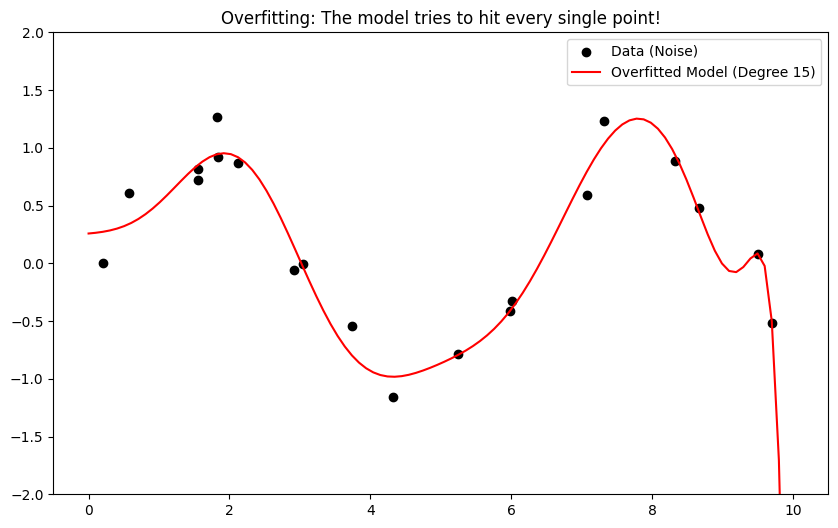

In [2]:
# do write code
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

np.random.seed(42)
x = np.sort(np.random.rand(20)) * 10
y = np.sin(x) + np.random.normal(0,0.2,20)

poly_model = make_pipeline(PolynomialFeatures(degree = 15), LinearRegression())
poly_model.fit(x.reshape(-1,1),y)

x_plot = np.linspace(0,10,100).reshape(-1,1)
y_plot = poly_model.predict(x_plot)

plt.figure(figsize=(10,6))
plt.scatter(x,y, color='black', label='Data (Noise)')
plt.plot(x_plot, y_plot, color='red', label='Overfitted Model (Degree 15)')
plt.ylim(-2,2)
plt.title('Overfitting: The model tries to hit every single point!')
plt.legend()
plt.show()

## 5.3. \[예제 2\] 릿지(Ridge) 회귀: 부드러운 제약

위와 똑같은 15차 모델이지만, 이번에는 Ridge 규제를 적용하여 모델을
진정시킨다.

상황: 복잡한 모델에 “가중치를 작게 유지하라”는 제약을 건다.

``` python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler # StandardScaler 추가
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline

# 1. 데이터 생성 (이전과 동일)
np.random.seed(42)
X = np.sort(np.random.rand(20)) * 10
y = np.sin(X) + np.random.normal(0, 0.2, 20)
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)

# 2. 과적합 모델 (비교용, 이전과 동일)
poly_model = make_pipeline(PolynomialFeatures(degree=15), LinearRegression())
poly_model.fit(X.reshape(-1, 1), y)
y_plot = poly_model.predict(X_plot)

# 3. 릿지 모델 (수정됨: StandardScaler 추가!)
# 순서: 다항변환 -> 스케일링 -> 릿지 회귀
ridge_model = make_pipeline(
    PolynomialFeatures(degree=15),
    StandardScaler(),  # <--- 여기가 핵심입니다.
    Ridge(alpha=1.0)
)
ridge_model.fit(X.reshape(-1, 1), y)

# 4. 시각화
y_ridge_plot = ridge_model.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Data')
plt.plot(X_plot, y_plot, color='red', linestyle='--', alpha=0.5, label='Overfitted (No Reg)')
plt.plot(X_plot, y_ridge_plot, color='blue', linewidth=2, label='Ridge (Standardized)')
plt.ylim(-2, 2)
plt.title('Ridge Regression with Scaling: Solving Ill-Conditioned Matrix')
plt.legend()
plt.show()

# 설명:
# 파란 선(Ridge)은 여전히 15차 식이지만, 빨간 점선처럼 날뛰지 않고 부드러운 곡선을 그린다.
# 규제가 가중치가 폭발하는 것을 막았기 때문이다.
```


> 📖 문제 풀이 가이드
>
> 과적합된 모델을 진정시키는 첫 번째 규제 기법, 릿지(Ridge, L2 Regularization)입니다.
> - 핵심 원리: 오차를 줄이는 것뿐만 아니라, "가중치($w$)의 제곱 합을 최소화하라"는 목표를 추가합니다.
> - 효과: 가중치가 전반적으로 작아집니다. 그래프가 데이터 점을 조금 놓치더라도 부드러운 곡선이 됩니다. (일반화 성능 향상)
> - 특징: 변수를 아예 없애지는 않고, 영향력을 골고루 줄여줍니다.



In [ ]:
# do write code


## 5.4. \[예제 3\] 라쏘(Lasso) 회귀: 불필요한 변수 제거

라쏘는 규제를 통해 가중치를 아예 0으로 만들어버린다. 이는 ‘자동으로
중요한 변수만 남기는 기능’과 같다.

상황: 100개의 가짜 변수(Noise)가 섞인 데이터에서 진짜 의미 있는 변수
찾기.

``` python
from sklearn.linear_model import Lasso

# 1. 데이터 준비: 100개의 변수가 있지만, 실제로 y에 영향을 주는 건 앞의 5개뿐이라고 가정
np.random.seed(0)
X_many = np.random.randn(50, 100) # 50개 샘플, 100개 변수
# 정답 식: y = 3*x1 + 2*x2 + ... (나머지 95개 변수는 영향 없음)
true_coef = np.zeros(100)
true_coef[:5] = [3, 2, 1.5, 1, 0.5]
y_many = np.dot(X_many, true_coef) + np.random.normal(0, 0.1, 50)

# 2. 라쏘 모델 학습
lasso = Lasso(alpha=0.1)
lasso.fit(X_many, y_many)

# 3. 살아남은 변수 확인
# 가중치가 0이 아닌 것만 카운트
n_selected = np.sum(lasso.coef_ != 0)

print(f"전체 변수 개수: 100개")
print(f"라쏘가 선택한 변수 개수: {n_selected}개")
print(f"라쏘가 찾은 주요 가중치:\n{lasso.coef_[:10]}") # 앞부분 5개는 값이 있고 뒤는 0이 됨

# 설명:
# 라쏘는 100개의 변수 중 쓸모없는 90여 개를 0으로 만들어버렸다.
# 유전자 데이터처럼 변수가 수만 개일 때, 중요한 유전자만 솎아내는 데 매우 유용하다.
```


> 📖 문제 풀이 가이드
>
> 두 번째 규제 기법, 라쏘(Lasso, L1 Regularization)입니다.
> - 핵심 원리: 오차 최소화 + "가중치($w$)의 절댓값 합을 최소화하라"는 목표를 추가합니다.
> - 효과: 중요하지 않은 변수의 가중치를 아예 0으로 만들어버립니다.
> - 용도: 변수가 너무 많을 때(예: 유전자 1만 개), 실제로 중요한 변수 몇 개만 골라내고 싶을 때 유용합니다. (Feature Selection)



In [ ]:
# do write code


## 5.5. \[예제 4\] 헬스케어 데이터 실전 비교 (Linear vs Ridge vs Lasso)

실제 당뇨병 데이터를 사용하여 세 모델의 가중치가 어떻게 다른지 비교한다.

상황: 당뇨병 데이터의 10개 변수에 대해 모델별로 어떤 가중치를
부여하는가?

``` python
from sklearn.datasets import load_diabetes

# 1. 데이터 로드
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# 2. 세 가지 모델 학습
lr = LinearRegression().fit(X, y)
ridge = Ridge(alpha=1.0).fit(X, y)
lasso = Lasso(alpha=1.0).fit(X, y)

# 3. 가중치 비교 시각화
plt.figure(figsize=(10, 6))
plt.plot(lr.coef_, 'o', label='Linear Regression')
plt.plot(ridge.coef_, 's', label='Ridge (L2)')
plt.plot(lasso.coef_, '^', label='Lasso (L1)')

plt.xticks(range(len(diabetes.feature_names)), diabetes.feature_names, rotation=45)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Comparison of Coefficients')
plt.ylabel('Coefficient Magnitude')
plt.legend()
plt.show()

# 설명:
# - 파란 동그라미(Linear)는 가중치 값이 매우 크고 들쑥날쑥하다.
# - 주황 네모(Ridge)는 가중치가 전체적으로 0쪽으로 수축(Shrinkage)되었다.
# - 초록 세모(Lasso)는 몇몇 변수(age, s1 등)가 아예 0이 되어 사라졌다.
```


> 📖 문제 풀이 가이드
>
> 실제 데이터(당뇨병)에서 일반 선형 회귀, 릿지, 라쏘가 어떻게 다르게 작동하는지 비교합니다.
> - 비교:
>   - Linear: 가중치가 매우 크고 플러스/마이너스로 왔다 갔다 합니다.
>   - Ridge: 가중치가 0 근처로 모여듭니다.
>   - Lasso: 몇몇 가중치는 완전히 0이 되어 사라집니다.



In [ ]:
# do write code


## 5.6. \[예제 5\] 하이퍼파라미터 Alpha의 영향

규제의 강도를 조절하는 `alpha` 값에 따라 모델이 어떻게 변하는지
확인한다. \* Alpha가 작으면: 규제가 약함 $\rightarrow$ Linear
Regression과 비슷해짐 (과적합 위험). \* Alpha가 크면: 규제가 강함
$\rightarrow$ 모든 가중치가 0이 됨 (과소적합 위험).

``` python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

# 1. [중요] 5.2의 데이터 다시 생성 (이 부분이 빠져서 에러가 났습니다)
np.random.seed(42)
X = np.sort(np.random.rand(20)) * 10       # 0~10 사이 20개 점
y = np.sin(X) + np.random.normal(0, 0.2, 20) # 사인파 + 잡음

# 2. 시각화를 위한 X축 데이터 생성
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)

# 3. 그래프 그리기
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Data') # 원본 데이터 점

# 다양한 alpha 값에 따른 릿지 회귀선의 변화 확인
alphas = [0, 0.1, 1, 10, 100]

for a in alphas:
    # 파이프라인: 다항변환 -> 스케일링(필수) -> 릿지회귀
    model = make_pipeline(
        PolynomialFeatures(degree=15),
        StandardScaler(),
        Ridge(alpha=a)
    )
    model.fit(X.reshape(-1, 1), y)
    y_pred = model.predict(X_plot)
    
    # alpha=0은 사실상 규제가 없는 상태이므로 빨간 점선으로 표현 (비교용)
    if a == 0:
        plt.plot(X_plot, y_pred, 'r--', label=f'alpha={a} (No Reg)', alpha=0.7)
    else:
        plt.plot(X_plot, y_pred, label=f'alpha={a}')

plt.ylim(-2, 2)
plt.title('Effect of Alpha on Ridge Regression')
plt.legend()
plt.show()

# 설명:
# alpha=0 (파란선): 미친 듯이 요동친다 (과적합).
# alpha=100 (보라선): 거의 직선에 가까워진다 (과소적합, 데이터 무시).
# 적절한 alpha(0.1 ~ 1)를 찾는 것이 모델 튜닝의 핵심이다.
```


> 📖 문제 풀이 가이드
>
> 규제의 강도를 결정하는 하이퍼파라미터 Alpha의 중요성입니다.
> - Alpha = 0: 규제 없음 (= 그냥 선형 회귀). 과적합 위험.
> - Alpha 매우 큼: 규제 너무 강함. 가중치가 다 0이 돼서 예측을 포기함 (과소적합).
> - 숙제: 적절한 Alpha(Goldilocks)를 찾는 것이 엔지니어의 역할입니다.



In [ ]:
# do write code
